<a href="https://colab.research.google.com/github/leejunho12316/HonGongMachine/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_6_1_%EA%B5%B0%EC%A7%91_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 불러오기

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-01-23 01:15:16--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-01-23 01:15:16--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-01-23 01:15:16--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

In [5]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')
print("shape : ", fruits.shape)

shape :  (300, 100, 100)


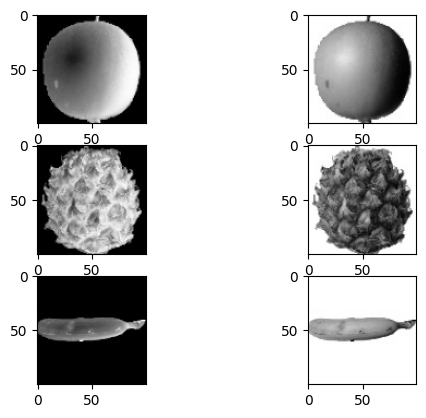

In [19]:
fig, axs = plt.subplots(3,2)

axs[0,0].imshow(fruits[0], cmap = 'gray')
axs[0,1].imshow(fruits[0], cmap = 'gray_r')
axs[1,0].imshow(fruits[100], cmap = 'gray')
axs[1,1].imshow(fruits[100], cmap = 'gray_r')
axs[2,0].imshow(fruits[200], cmap = 'gray')
axs[2,1].imshow(fruits[200], cmap = 'gray_r')

plt.show()

#데이터 전처리

In [30]:
apple = fruits[0:100].reshape(-1, 10000)
pineapple = fruits[100:200].reshape(-1,10000)
banana = fruits[200:300].reshape(-1, 10000)

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

#EDA

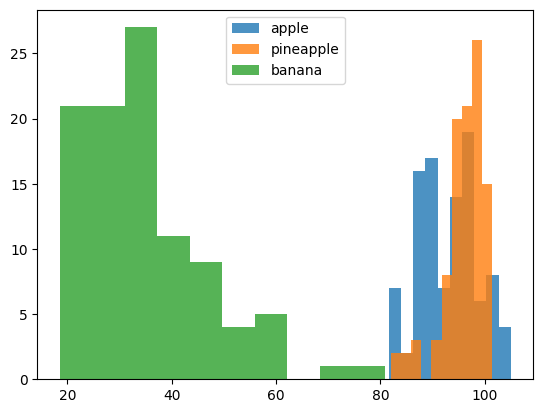

In [39]:
#하나의 이미지 값을 평균한 값의 분포

plt.hist(np.mean(apple, axis=1), alpha = 0.8)
plt.hist(np.mean(pineapple, axis=1), alpha = 0.8)
plt.hist(np.mean(banana, axis=1), alpha = 0.8)
plt.legend(['apple','pineapple','banana'])
plt.show()

<BarContainer object of 10000 artists>

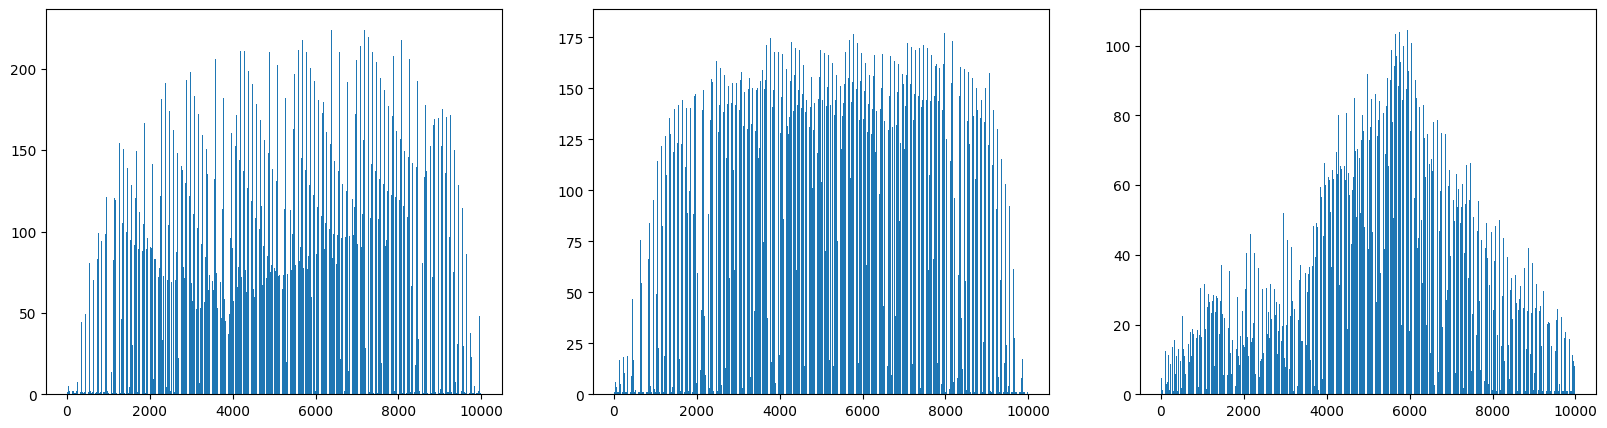

In [40]:
#'왜' 이렇게 mean한 다음에 그래프를 표현하는지 이해가 하나도 안감
fig, axs = plt.subplots(1,3, figsize = (20,5))

axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))

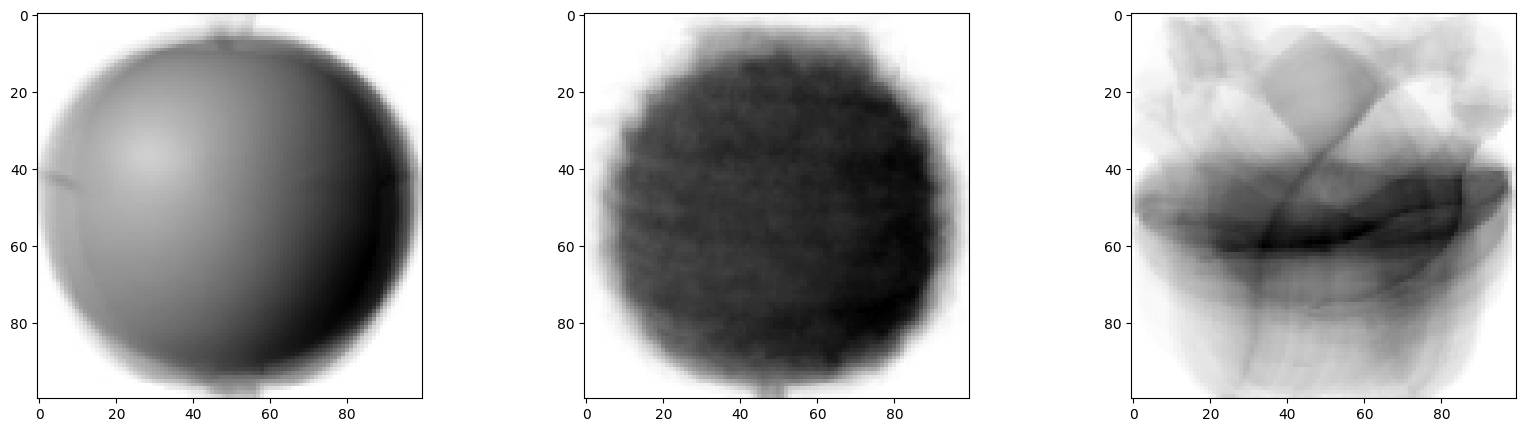

In [52]:
apple_mean = np.mean(apple,axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)

fig, axs = plt.subplots(1,3, figsize = (20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap = 'gray_r')
axs[2].imshow(banana_mean, cmap = 'gray_r')

#가까운 사과 고르기

In [57]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))

print(abs_diff.shape, abs_mean.shape)

(300, 100, 100) (300,)


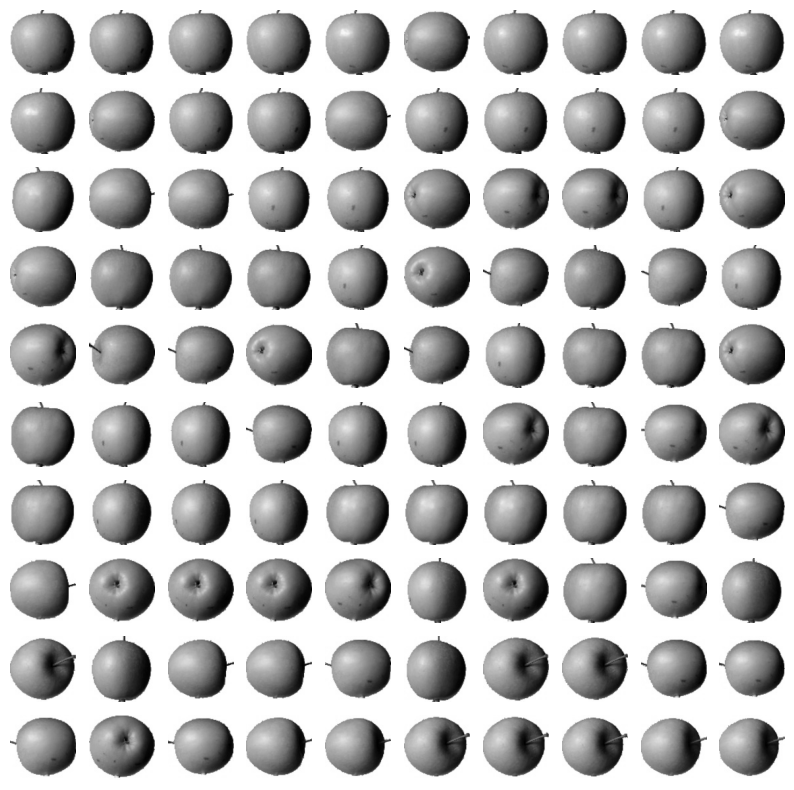

In [59]:
apple_index= np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize = (10,10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i * 10 + j]], cmap = 'gray_r')
    axs[i, j].axis('off')
plt.show()

#가까운 바나나 고르기

In [60]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))

print(abs_diff.shape, abs_mean.shape)

(300, 100, 100) (300,)


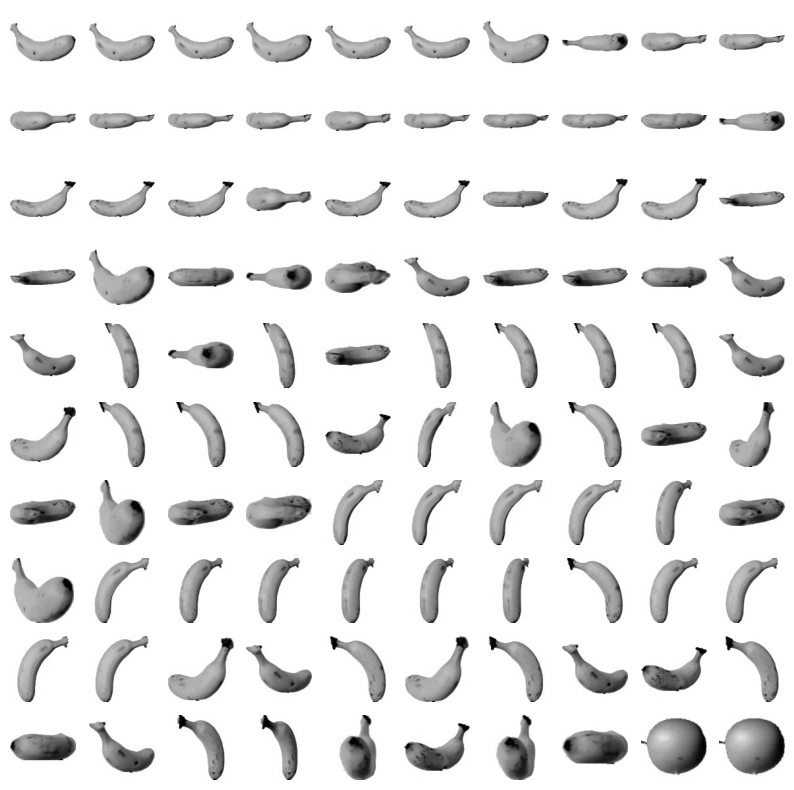

In [61]:
apple_index= np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize = (10,10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i * 10 + j]], cmap = 'gray_r')
    axs[i, j].axis('off')
plt.show()

#가까운 파인애플,,,

In [62]:
abs_diff = np.abs(fruits - pineapple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))

print(abs_diff.shape, abs_mean.shape)

(300, 100, 100) (300,)


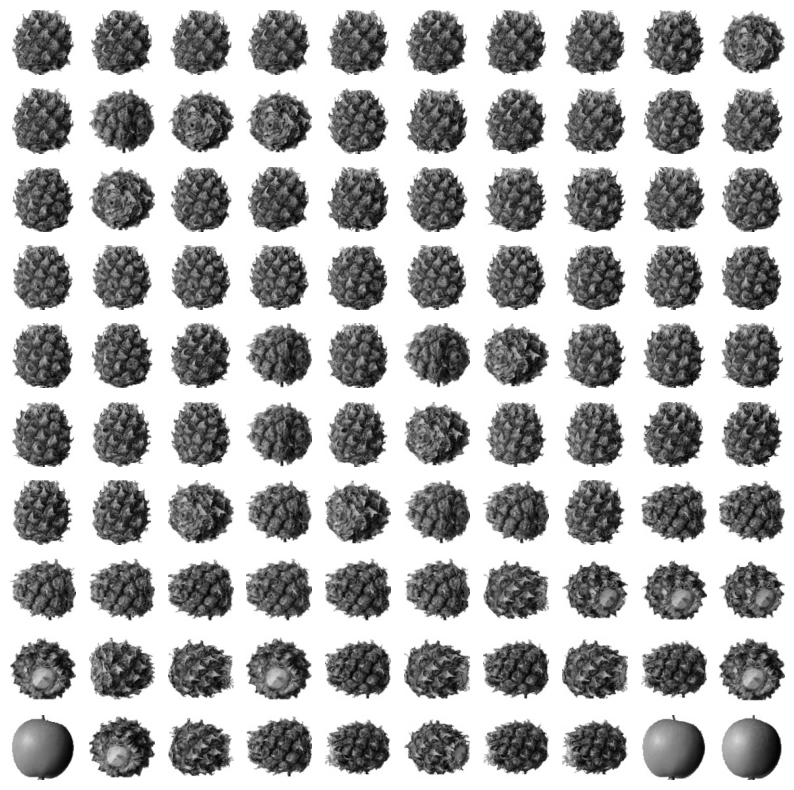

In [63]:
apple_index= np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize = (10,10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i * 10 + j]], cmap = 'gray_r')
    axs[i, j].axis('off')
plt.show()